# Análise Exploratória de Dados - Desafio VirteX
### **Análise de Dados do Call Center (CAC)**
#### Este notebook realiza a exploração inicial das bases de dados:
 - native_chamadas_atendidas
 - smart_atendimentos
 - smart_pesquisa
 - Agentes.csv

## 1. Importações e Configuração

In [1]:
# importações de principais bibliotecas
import pandas as pd
from sqlalchemy import create_engine, text
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import warnings

# Configurações gerais
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Estilo dos gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("OK:200")

OK:200


## 2. Conexão com MySQL

In [2]:
# Carregar credenciais do arquivo .env
load_dotenv()

def conectar_mysql():
    """Cria conexão com MySQL"""
    try:
        connection_string = (
            f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}"
            f"@{os.getenv('DB_HOST')}:{os.getenv('DB_PORT')}/{os.getenv('DB_NAME')}"
        )
        engine = create_engine(connection_string)
        
        # Testar conexão
        with engine.connect() as conn:
            conn.execute(text("SELECT 1"))
            
        print("Conexão estabelecida com sucesso!")
        print(f"Banco: {os.getenv('DB_NAME')}")
        return engine
    except Exception as e:
        print(f"Erro ao conectar: {e}")
        return None

In [3]:
engine = conectar_mysql()

Conexão estabelecida com sucesso!
Banco: data_test


## 3. Listando Tabelas Disponíveis

In [4]:
# Listando tabelas disponíveis
if engine:
    query = "SHOW TABLES"
    tabelas = pd.read_sql(query, engine)
    print(tabelas)
else:
    print("Erro: Conexão não estabelecida.")

         Tables_in_data_test
0  native_chamadas_atendidas
1         smart_atendimentos
2             smart_pesquisa


## 4. Explorando: native_chamadas_atendidas

In [5]:
# Estrutura da tabela
query_structure = "DESCRIBE native_chamadas_atendidas"
estrutura_native = pd.read_sql(query_structure, engine)
print("Estrutura da tabela:")
display(estrutura_native)

# Contagem de registros
query_count = "SELECT COUNT(*) as total FROM native_chamadas_atendidas"
total_native = pd.read_sql(query_count, engine)
print(f"\nTotal de registros: {total_native['total'].values[0]:,}")


Estrutura da tabela:


,Field,Type,Null,Key,Default,Extra
0,id,int,NO,PRI,None,auto_increment
1,callid,varchar(100),YES,,None,
2,data_hora,datetime,NO,,None,
3,fila,varchar(100),YES,,None,
4,espera,time,YES,,None,
5,atendimento,time,YES,,None,
6,sentido,varchar(50),YES,,None,
7,nota1,varchar(2),YES,,None,
8,nota2,varchar(2),YES,,None,
9,nota3,varchar(2),YES,,None,



Total de registros: 37,702


In [6]:
# Extração
df_native = pd.read_sql("SELECT * FROM native_chamadas_atendidas", engine)
print(f"{len(df_native):,} registros carregados")

# Primeiras linhas
print("\nPrimeiras 3 linhas:")
display(df_native.head(3))

# Informações gerais
print("\nInformações do DataFrame:")
df_native.info()


37,702 registros carregados

Primeiras 3 linhas:


,id,callid,data_hora,fila,espera,atendimento,sentido,nota1,nota2,nota3,agente
0,1,1641036840116426,2022-01-01 08:34:46,Tatooine,0 days 00:00:04,0 days 00:03:35,Recebida,2,1,3,Jon Skywalker
1,2,1641038955116436,2022-01-01 09:10:01,Coruscant,0 days 00:00:06,0 days 00:02:37,Recebida,1,5,2,Daenerys Organa
2,3,1641039067116440,2022-01-01 09:11:43,Coruscant,0 days 00:00:02,0 days 00:05:21,Recebida,1,1,3,Tyrion Solo



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37702 entries, 0 to 37701
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   id           37702 non-null  int64          
 1   callid       37702 non-null  object         
 2   data_hora    37702 non-null  datetime64[ns] 
 3   fila         37702 non-null  object         
 4   espera       37702 non-null  timedelta64[ns]
 5   atendimento  37702 non-null  timedelta64[ns]
 6   sentido      37702 non-null  object         
 7   nota1        37702 non-null  object         
 8   nota2        37702 non-null  object         
 9   nota3        37702 non-null  object         
 10  agente       37702 non-null  object         
dtypes: datetime64[ns](1), int64(1), object(7), timedelta64[ns](2)
memory usage: 3.2+ MB


In [7]:
# Análise de valores nulos
print("Análise de Valores Nulos:")
print(df_native.isnull().sum())

Análise de Valores Nulos:
id             0
callid         0
data_hora      0
fila           0
espera         0
atendimento    0
sentido        0
nota1          0
nota2          0
nota3          0
agente         0
dtype: int64


In [8]:
# Lista de colunas
print(df_native.columns.to_list())

# Estatísticas descritivas
print("\nEstatísticas Descritivas:")
display(df_native.describe())

['id', 'callid', 'data_hora', 'fila', 'espera', 'atendimento', 'sentido', 'nota1', 'nota2', 'nota3', 'agente']

Estatísticas Descritivas:


,id,data_hora,espera,atendimento
count,37702.00,37702,37702,37702
mean,18851.50,2022-02-15 15:43:58.219776,0 days 00:00:21.161476844,0 days 00:04:13.419526815
min,1.00,2022-01-01 08:34:46,0 days 00:00:00,0 days 00:00:00
25%,9426.25,2022-01-26 15:06:09.249999872,0 days 00:00:04,0 days 00:00:25
50%,18851.50,2022-02-15 16:44:12,0 days 00:00:12,0 days 00:02:20
75%,28276.75,2022-03-09 14:53:14,0 days 00:00:24,0 days 00:06:00
max,37702.00,2022-03-30 21:44:23,0 days 00:23:23,0 days 01:18:38
std,10883.77,NaN,0 days 00:00:34.213478026,0 days 00:05:25.862901584


In [9]:
df_native['atendimento'].quantile([0.26, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

0.26             0 days 00:00:29
0.50             0 days 00:02:20
0.75             0 days 00:06:00
0.80             0 days 00:07:09
0.90             0 days 00:10:57
0.95             0 days 00:14:48
0.99   0 days 00:24:25.959999999
Name: atendimento, dtype: timedelta64[ns]

VALIDAÇÃO: Atendimentos válidos (≥ 30 segundos)

Analisando coluna: atendimento



Atendimentos válidos (≥30s): 27,842 (73.85%)
Atendimentos inválidos (<30s): 9,860 (26.15%)
Valores nulos: 0 (0.00%)


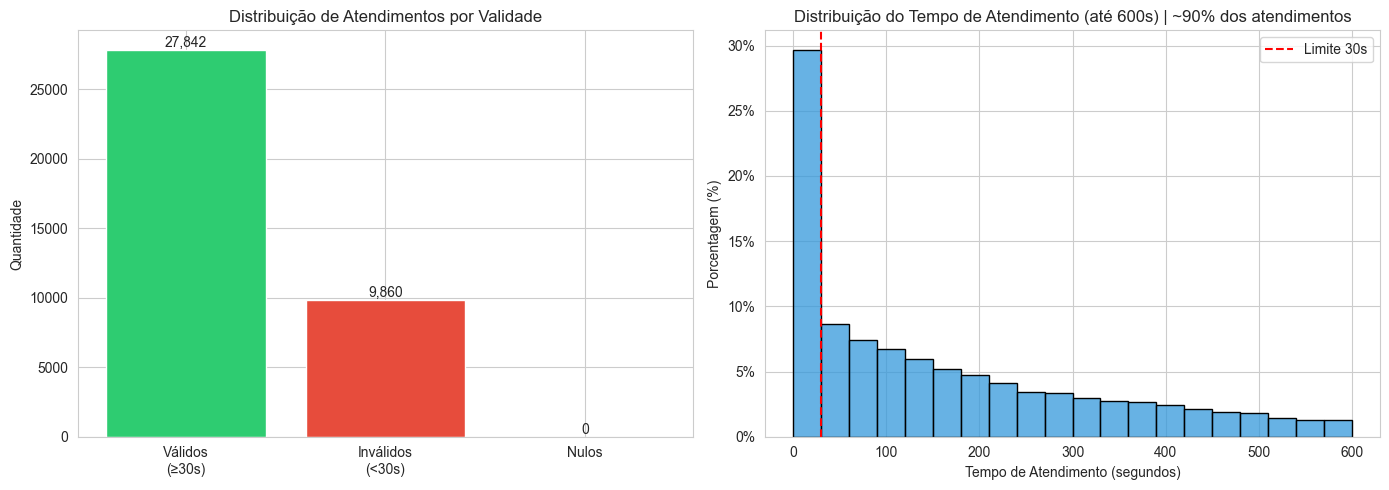

In [10]:
# Análise específica: Atendimentos válidos (>= 30 segundos)
print("VALIDAÇÃO: Atendimentos válidos (≥ 30 segundos)")

# Colunas de data e duração
colunas_tempo = ['data_hora', 'espera', 'atendimento']

col_tempo = colunas_tempo[2]  # Seleciona a coluna de atendimento
print(f"\nAnalisando coluna: {col_tempo}")
coluna_tempo_segundos = f'{col_tempo}_segundos'
df_native[coluna_tempo_segundos] = df_native[col_tempo].dt.total_seconds().astype(int)

validos = (df_native[coluna_tempo_segundos] >= 30).sum()
invalidos = (df_native[coluna_tempo_segundos] < 30).sum()
nulos = df_native[coluna_tempo_segundos].isnull().sum()

print(f"\nAtendimentos válidos (≥30s): {validos:,} ({validos/len(df_native)*100:.2f}%)")
print(f"Atendimentos inválidos (<30s): {invalidos:,} ({invalidos/len(df_native)*100:.2f}%)")
print(f"Valores nulos: {nulos:,} ({nulos/len(df_native)*100:.2f}%)")

# Visualização
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Distribuição
categorias = ['Válidos\n(≥30s)', 'Inválidos\n(<30s)', 'Nulos']
valores = [validos, invalidos, nulos]
cores = ['#2ecc71', '#e74c3c', '#95a5a6']

ax[0].bar(categorias, valores, color=cores)
ax[0].set_ylabel('Quantidade')
ax[0].set_title('Distribuição de Atendimentos por Validade')
for i, v in enumerate(valores):
    ax[0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Histograma de tempo
largura_segundos_grafico = 600
data_to_plot = df_native[df_native[coluna_tempo_segundos] <= largura_segundos_grafico][coluna_tempo_segundos]

sns.histplot(
    data=data_to_plot,
    bins=20,             
    ax=ax[1],
    color='#3498db',
    edgecolor='black',
    stat="percent"     
)


ax[1].yaxis.set_major_formatter(PercentFormatter(decimals=0))
ax[1].axvline(30, color='red', linestyle='--', label='Limite 30s')
ax[1].set_xlabel('Tempo de Atendimento (segundos)')
ax[1].set_ylabel('Porcentagem (%)')
ax[1].set_title(f"Distribuição do Tempo de Atendimento (até {largura_segundos_grafico}s) | ~90% dos atendimentos")
ax[1].legend()

plt.tight_layout()
plt.show()

ANÁLISE DE NPS (Net Promoter Score)

Distribuição de Notas (nota2):


nota2
1      572
2      145
3      237
4      656
5    11471
Name: count, dtype: Int64


Atendimentos avaliados: 13,081 (34.70%)
Não avaliados: 24,621 (65.30%)


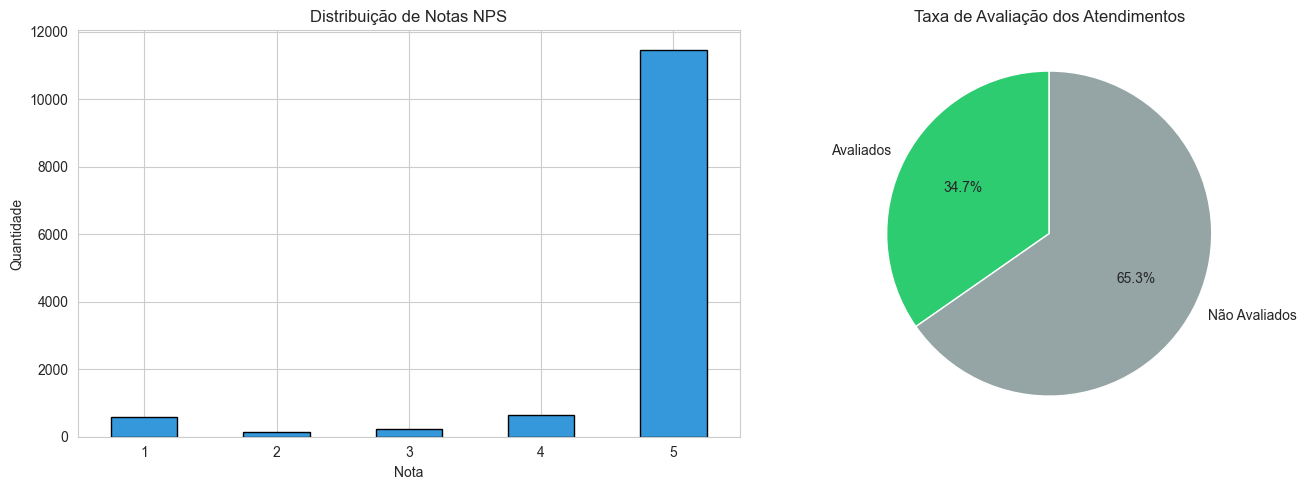

In [11]:
# Análise de NPS (Notas)
print("ANÁLISE DE NPS (Net Promoter Score)")

colunas_nota = ['nota1', 'nota2', 'nota3']

col_nota = colunas_nota[1]

print(f"\nDistribuição de Notas ({col_nota}):")
df_native[col_nota] = pd.to_numeric(df_native[col_nota], errors='coerce').astype('Int64')
distribuicao_notas = df_native[col_nota].value_counts().sort_index()
display(distribuicao_notas)

avaliados = df_native[col_nota].notna().sum()
nao_avaliados = df_native[col_nota].isnull().sum()
taxa_avaliacao = (avaliados / len(df_native) * 100)

print(f"\nAtendimentos avaliados: {avaliados:,} ({taxa_avaliacao:.2f}%)")
print(f"Não avaliados: {nao_avaliados:,} ({(nao_avaliados/len(df_native)*100):.2f}%)")

# Visualização
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras - Notas
distribuicao_notas.plot(kind='bar', ax=ax[0], color='#3498db', edgecolor='black')
ax[0].set_xlabel('Nota')
ax[0].set_ylabel('Quantidade')
ax[0].set_title('Distribuição de Notas NPS')
ax[0].tick_params(axis='x', rotation=0)

# Pizza - Taxa de avaliação
ax[1].pie([avaliados, nao_avaliados], 
            labels=['Avaliados', 'Não Avaliados'],
            autopct='%1.1f%%',
            colors=['#2ecc71', '#95a5a6'],
            startangle=90)
ax[1].set_title('Taxa de Avaliação dos Atendimentos')

plt.tight_layout()
plt.show()

ANÁLISE DE AGENTES

Total de agentes únicos: 43

Top 10 Agentes (por volume de atendimentos):


agente
Jorah Vader         3225
Bran Calrissian     3060
Barristan Kylo      2716
Hodor Windu         2456
Sandor Solo         2115
Tyrion Solo         1962
Theon Hutt          1907
Melisandre Dooku    1676
Robb Binks          1648
Eddard Yoda         1587
Name: count, dtype: int64


Top 10 Agentes com baixa performance (nota < 4):


agente
Bran Calrissian     128
Jorah Vader         119
Sandor Solo          98
Hodor Windu          84
Tyrion Solo          58
Robb Binks           54
Khal Maul            51
Theon Hutt           51
Cersei Palpatine     43
Varys Dooku          37
Name: count, dtype: int64

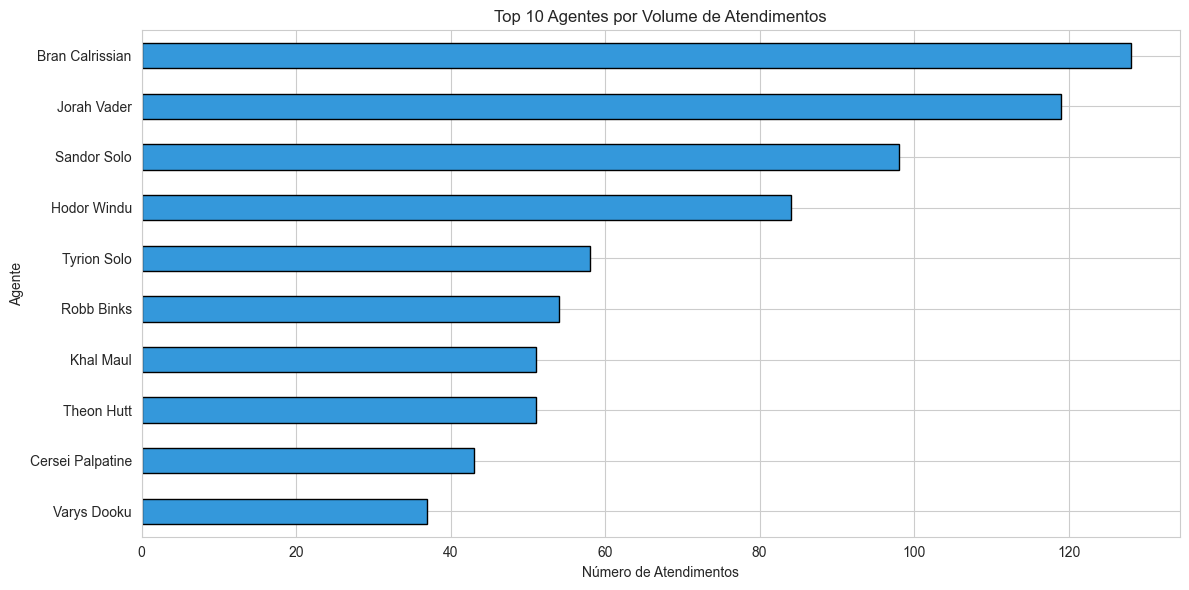

In [12]:
# Análise de Agentes
print("ANÁLISE DE AGENTES")

col_agente = 'agente'
    
total_agentes = df_native[col_agente].nunique()
print(f"\nTotal de agentes únicos: {total_agentes}")
    
# Top 10 agentes por volume
top_agentes = df_native[col_agente].value_counts().head(10)
print(f"\nTop 10 Agentes (por volume de atendimentos):")
display(top_agentes)

# Top 10 agentes com baixa performance (nota < 4)
top_agentes = df_native[df_native['nota2']<4][col_agente].value_counts().head(10)
print(f"\nTop 10 Agentes com baixa performance (nota < 4):")
display(top_agentes)

# Visualização
plt.figure(figsize=(12, 6))
top_agentes.plot(kind='barh', color='#3498db', edgecolor='black')
plt.xlabel('Número de Atendimentos')
plt.ylabel('Agente')
plt.title('Top 10 Agentes por Volume de Atendimentos')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 5. Explorando: smart_atendimentos

In [13]:
# Ler dados da tabela smart_atendimentos
df_smart = pd.read_sql("SELECT * FROM smart_atendimentos", engine)
print(f"{len(df_smart):,} linhas carregadas")

print("\nPrimeiras 3 linhas:")
display(df_smart.head(3))

print("\nInformações do DataFrame:")
df_smart.info()


63,804 linhas carregadas

Primeiras 3 linhas:


,id,id_atendimento,protocolo,data_atendimento,fila,tempo_fila,tempo_atendimento,agente
0,1,217037,64600000217037,2022-01-01 07:29:07,Tatooine,0 days 07:21:27,0 days 00:00:49,Yara Snoke
1,2,217040,74510000217040,2022-01-01 00:24:11,Coruscant,0 days 00:00:00,0 days 00:00:00,None
2,3,217042,74840000217042,2022-01-01 00:24:44,Coruscant,0 days 00:00:00,0 days 00:00:00,None



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63804 entries, 0 to 63803
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   id                 63804 non-null  int64          
 1   id_atendimento     63804 non-null  int64          
 2   protocolo          63804 non-null  object         
 3   data_atendimento   63804 non-null  datetime64[ns] 
 4   fila               63804 non-null  object         
 5   tempo_fila         63804 non-null  timedelta64[ns]
 6   tempo_atendimento  63804 non-null  timedelta64[ns]
 7   agente             37606 non-null  object         
dtypes: datetime64[ns](1), int64(2), object(3), timedelta64[ns](2)
memory usage: 3.9+ MB


In [14]:
# Análise de valores nulos
print("Análise de Valores Nulos:")
nulos_smart = df_smart.isnull().sum()
nulos_pct_smart = (df_smart.isnull().sum() / len(df_smart) * 100).round(2)
resumo_nulos_smart = pd.DataFrame({
    'Nulos': nulos_smart,
    'Percentual (%)': nulos_pct_smart
})
display(resumo_nulos_smart[resumo_nulos_smart['Nulos'] > 0].sort_values('Nulos', ascending=False))


Análise de Valores Nulos:


,Nulos,Percentual (%)
agente,26198,41.06


In [15]:
# Estatísticas descritivas
print("Estatísticas Descritivas:")
display(df_smart.describe())

Estatísticas Descritivas:


,id,id_atendimento,data_atendimento,tempo_fila,tempo_atendimento
count,63804.00,63804.00,63804,63804,63804
mean,31902.50,248978.58,2022-02-14 05:46:21.857296896,0 days 00:01:18.871246316,0 days 00:24:53.498511065
min,1.00,217037.00,2022-01-01 00:20:15,0 days 00:00:00,0 days 00:00:00
25%,15951.75,233008.75,2022-01-22 23:10:37,0 days 00:00:00,0 days 00:09:16
50%,31902.50,248972.50,2022-02-14 10:35:04,0 days 00:00:00,0 days 00:18:15
75%,47853.25,264953.25,2022-03-08 14:56:11,0 days 00:00:02,0 days 00:32:34
max,63804.00,280919.00,2022-03-30 23:41:30,1 days 15:41:38,12 days 07:42:39
std,18418.77,18442.27,NaN,0 days 00:33:35.245923140,0 days 02:05:57.713798708


In [16]:
df_smart['tempo_fila'].quantile([0.75, 0.85, 0.9, 0.97, 0.98, 0.99])

0.75          0 days 00:00:02
0.85          0 days 00:00:02
0.90          0 days 00:00:03
0.97          0 days 00:00:03
0.98          0 days 00:00:08
0.99   0 days 00:03:40.970000
Name: tempo_fila, dtype: timedelta64[ns]

In [17]:
df_smart[df_smart['id'] == 15446]

,id,id_atendimento,protocolo,data_atendimento,fila,tempo_fila,tempo_atendimento,agente
15445,15446,232583,72400000232583,2022-01-24 07:28:58,Tatooine,1 days 15:41:38,0 days 00:15:18,Yara Snoke


Análise de Atendimentos por Agente vs. Bot



Atendimentos com agentes: 37,606 (58.94%)
Não avaliados: 26,198 (41.06%)


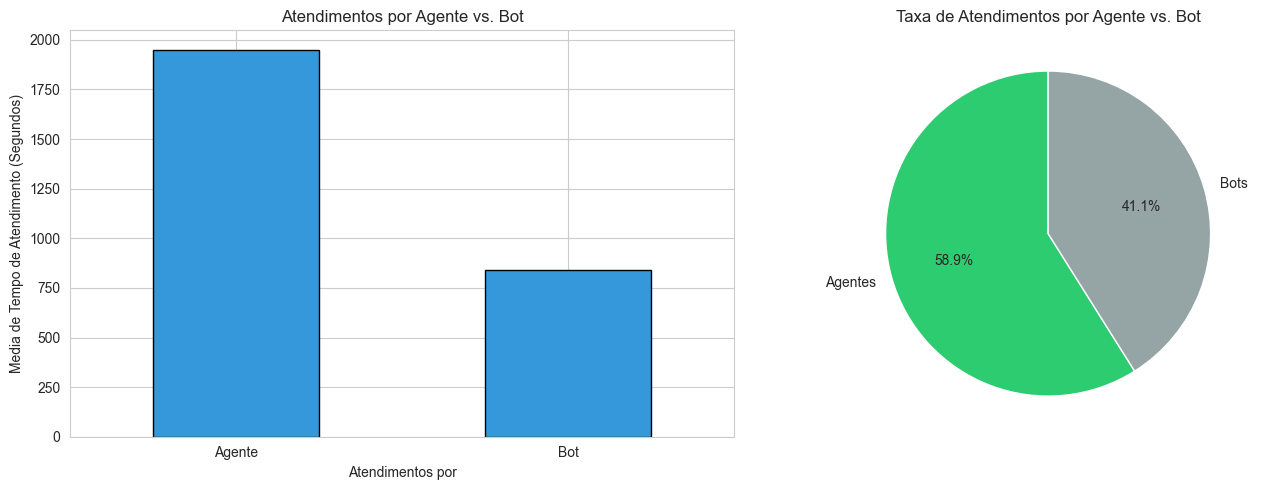

In [18]:
# Análise de Atendimentos por Agente vs. Bot
print("Análise de Atendimentos por Agente vs. Bot")

df_smart['tempo_fila_segundos'] = df_smart['tempo_fila'].dt.total_seconds().astype(int)
df_smart['tempo_atendimento_segundos'] = df_smart['tempo_atendimento'].dt.total_seconds().astype(int)

coluna_agente = 'agente'

atendimento_agentes = df_smart[coluna_agente].notna().sum()
atendimento_bots = df_smart[coluna_agente].isnull().sum()
taxa_agentes = (atendimento_agentes / len(df_smart) * 100)

print(f"\nAtendimentos com agentes: {atendimento_agentes:,} ({taxa_agentes:.2f}%)")
print(f"Não avaliados: {atendimento_bots:,} ({(atendimento_bots/len(df_smart)*100):.2f}%)")

# Visualização
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de tempo médio de atendimento por agente vs. bot
tempo_medio_smart = df_smart[['agente', 'tempo_atendimento_segundos']].copy()
tempo_medio_smart['grupo'] = tempo_medio_smart['agente'].apply(lambda x: 'Agente' if pd.notna(x) else 'Bot')
tempo_medio_smart = tempo_medio_smart.groupby('grupo')['tempo_atendimento_segundos'].mean().reset_index()

tempo_medio_smart.plot(kind='bar', x= 'grupo', y='tempo_atendimento_segundos', ax=ax[0], color='#3498db', edgecolor='black', legend=False)

ax[0].set_xlabel('Atendimentos por')
ax[0].set_ylabel('Media de Tempo de Atendimento (Segundos)')
ax[0].set_title('Atendimentos por Agente vs. Bot')
ax[0].tick_params(axis='x', rotation=0)

# Pizza - Taxa de avaliação
ax[1].pie([atendimento_agentes, atendimento_bots], 
            labels=['Agentes', 'Bots'],
            autopct='%1.1f%%',
            colors=['#2ecc71', '#95a5a6'],
            startangle=90)
ax[1].set_title('Taxa de Atendimentos por Agente vs. Bot')

plt.tight_layout()
plt.show()

Análise de Tempo de Espera e Atendimento


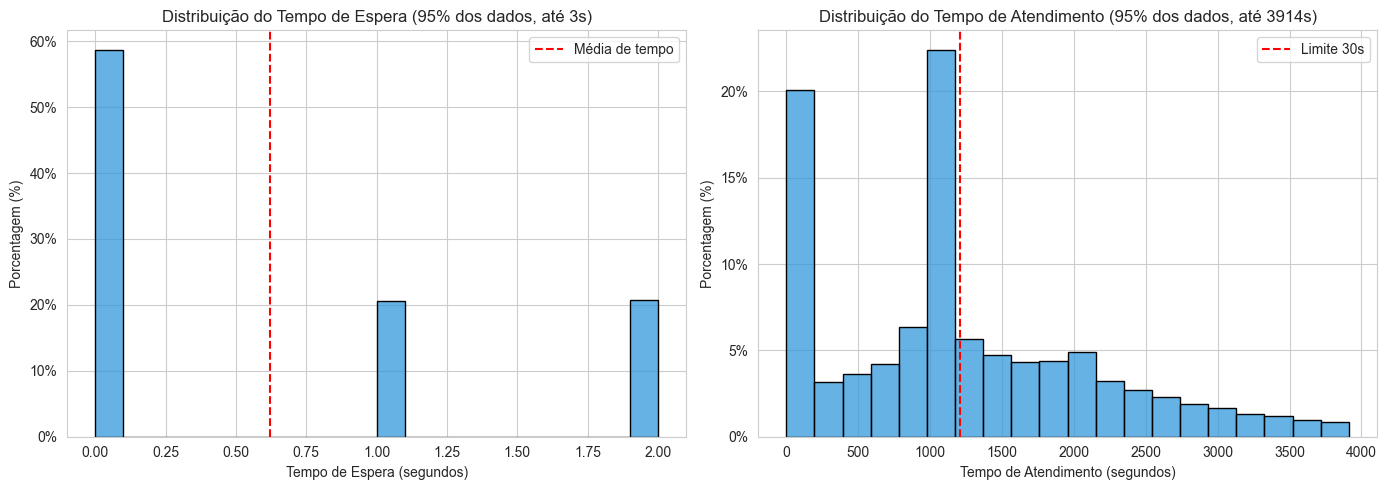

In [19]:
# Análise de Tempo de Espera e Atendimento
print("Análise de Tempo de Espera e Atendimento")

limite_espera = df_smart['tempo_fila_segundos'].quantile(0.95)
limite_atendimento = df_smart['tempo_atendimento_segundos'].quantile(0.95)

# Visualização
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histograma de Tempo de Espera
df_espera = df_smart[df_smart['tempo_fila_segundos'] < limite_espera]
sns.histplot(
    data=df_espera['tempo_fila_segundos'],
    bins=20,             
    ax=ax[0],
    color='#3498db',
    edgecolor='black',
    stat="percent"     
)

ax[0].yaxis.set_major_formatter(PercentFormatter(decimals=0))
ax[0].axvline(df_espera['tempo_fila_segundos'].mean(), color='red', linestyle='--', label='Média de tempo')
ax[0].set_xlabel('Tempo de Espera (segundos)')
ax[0].set_ylabel('Porcentagem (%)')
ax[0].set_title(f"Distribuição do Tempo de Espera (95% dos dados, até {limite_espera:.0f}s)")
ax[0].legend()

# Histograma de tempo de Atendimento
df_atendimento = df_smart[df_smart['tempo_atendimento_segundos'] < limite_atendimento]
sns.histplot(
    data=df_atendimento['tempo_atendimento_segundos'],
    bins=20,             
    ax=ax[1],
    color='#3498db',
    edgecolor='black',
    stat="percent"     
)

ax[1].yaxis.set_major_formatter(PercentFormatter(decimals=0))
ax[1].axvline(df_atendimento['tempo_atendimento_segundos'].mean(), color='red', linestyle='--', label='Limite 30s')
ax[1].set_xlabel('Tempo de Atendimento (segundos)')
ax[1].set_ylabel('Porcentagem (%)')
ax[1].set_title(f"Distribuição do Tempo de Atendimento (95% dos dados, até {limite_atendimento:.0f}s)")
ax[1].legend()

plt.tight_layout()
plt.show()

##  6. Explorando: smart_pesquisa

In [20]:
# Ler dados da tabela smart_pesquisa
df_pesquisa = pd.read_sql("SELECT * FROM smart_pesquisa", engine)
print(f"{len(df_pesquisa):,} linhas carregadas")

20,002 linhas carregadas


In [21]:
print("\nPrimeiras 3 linhas:")
display(df_pesquisa.head(3))

df_pesquisa.info()


Primeiras 3 linhas:


,id,id_atendimento,protocolo,data_resposta,resposta,agente
0,1,217051,39580000217051,2022-01-01 08:06:36,Muito Bom,Daenerys Organa
1,2,217064,65310000217064,2022-01-01 08:38:10,Muito Bom,Daenerys Organa
2,3,217063,62870000217063,2022-01-01 08:41:52,Bom,Jon Skywalker


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20002 entries, 0 to 20001
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              20002 non-null  int64         
 1   id_atendimento  20002 non-null  int64         
 2   protocolo       20002 non-null  int64         
 3   data_resposta   20002 non-null  datetime64[ns]
 4   resposta        20002 non-null  object        
 5   agente          18452 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 937.7+ KB


In [22]:
# Análise de valores nulos
print("Análise de Valores Nulos:")
nulos_pesquisa = df_pesquisa.isnull().sum()
nulos_pct_pesquisa = (df_pesquisa.isnull().sum() / len(df_pesquisa) * 100).round(2)
resumo_nulos_pesquisa = pd.DataFrame({
    'Nulos': nulos_pesquisa,
    'Percentual (%)': nulos_pct_pesquisa
})
display(resumo_nulos_pesquisa[resumo_nulos_pesquisa['Nulos'] > 0].sort_values('Nulos', ascending=False))


Análise de Valores Nulos:


,Nulos,Percentual (%)
agente,1550,7.75


In [23]:
df_pesquisa['resposta'].value_counts().sort_index()


resposta
Bom            3258
Muito Bom     15503
Muito Ruim      596
Regular         547
Ruim             98
Name: count, dtype: int64

In [24]:
classificacao_respostas = [
    'Muito Ruim', 
    'Ruim', 
    'Regular', 
    'Bom', 
    'Muito Bom'
]

In [25]:
display(df_pesquisa[df_pesquisa['agente'].isnull()])
df_pesquisa['agente'].isnull().describe()

,id,id_atendimento,protocolo,data_resposta,resposta,agente
298,299,218049,4630000218036,2022-01-03 18:07:42,Muito Bom,None
431,432,218568,68100000218568,2022-01-04 11:47:58,Muito Bom,None
448,449,218609,81990000218609,2022-01-04 12:25:12,Bom,None
449,450,218603,78830000218603,2022-01-04 12:25:55,Muito Bom,None
560,561,219045,88820000219045,2022-01-04 18:17:11,Muito Bom,None
...,...,...,...,...,...,...
19995,19996,280899,84110000280899,2022-03-30 22:04:25,Bom,None
19998,19999,280903,97750000280903,2022-03-30 22:24:29,Muito Bom,None
19999,20000,280904,1330000280904,2022-03-30 22:31:00,Muito Bom,None
20000,20001,280908,12560000280908,2022-03-30 22:49:38,Muito Bom,None


count     20002
unique        2
top       False
freq      18452
Name: agente, dtype: object

In [26]:
df_pesquisa['agente'].nunique()

25

## 6.5 Dataframe Smart Completo

In [27]:
df_smart_completo = pd.merge(
    df_smart,
    df_pesquisa,
    on='id_atendimento',
    how='left',
    suffixes=('_atend', '_pesq')
)

In [28]:
display(df_smart_completo[df_smart_completo['agente_atend'].isnull()].head(3))
display(df_smart_completo[df_smart_completo['resposta'].notna()].head(3))

,id_atend,id_atendimento,protocolo_atend,data_atendimento,fila,tempo_fila,tempo_atendimento,agente_atend,tempo_fila_segundos,tempo_atendimento_segundos,id_pesq,protocolo_pesq,data_resposta,resposta,agente_pesq
1,2,217040,74510000217040,2022-01-01 00:24:11,Coruscant,0 days,0 days 00:00:00,None,0,0,NaN,NaN,NaT,NaN,NaN
2,3,217042,74840000217042,2022-01-01 00:24:44,Coruscant,0 days,0 days 00:00:00,None,0,0,NaN,NaN,NaT,NaN,NaN
3,4,217038,72150000217038,2022-01-01 00:20:15,Naboo,0 days,0 days 00:18:46,None,0,1126,NaN,NaN,NaT,NaN,NaN


,id_atend,id_atendimento,protocolo_atend,data_atendimento,fila,tempo_fila,tempo_atendimento,agente_atend,tempo_fila_segundos,tempo_atendimento_segundos,id_pesq,protocolo_pesq,data_resposta,resposta,agente_pesq
14,15,217051,39580000217051,2022-01-01 07:46:23,Endor,0 days 00:00:01,0 days 00:20:21,Daenerys Organa,1,1221,1.00,39580000217051.00,2022-01-01 08:06:36,Muito Bom,Daenerys Organa
26,27,217063,62870000217063,2022-01-01 08:27:16,Hoth,0 days 00:00:01,0 days 00:14:48,Jon Skywalker,1,888,3.00,62870000217063.00,2022-01-01 08:41:52,Bom,Jon Skywalker
27,28,217064,65310000217064,2022-01-01 08:29:52,Mustafar,0 days 00:00:01,0 days 00:08:25,Daenerys Organa,1,505,2.00,65310000217064.00,2022-01-01 08:38:10,Muito Bom,Daenerys Organa


In [29]:
df_smart_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65581 entries, 0 to 65580
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   id_atend                    65581 non-null  int64          
 1   id_atendimento              65581 non-null  int64          
 2   protocolo_atend             65581 non-null  object         
 3   data_atendimento            65581 non-null  datetime64[ns] 
 4   fila                        65581 non-null  object         
 5   tempo_fila                  65581 non-null  timedelta64[ns]
 6   tempo_atendimento           65581 non-null  timedelta64[ns]
 7   agente_atend                39309 non-null  object         
 8   tempo_fila_segundos         65581 non-null  int64          
 9   tempo_atendimento_segundos  65581 non-null  int64          
 10  id_pesq                     19984 non-null  float64        
 11  protocolo_pesq              19984 non-nul

ANÁLISE DE NPS (Net Promoter Score)


resposta
Muito Ruim      596
Ruim             97
Regular         547
Bom            3253
Muito Bom     15491
Name: count, dtype: int64


Atendimentos avaliados: 19,984 (30.47%)
Não avaliados: 45,597 (69.53%)


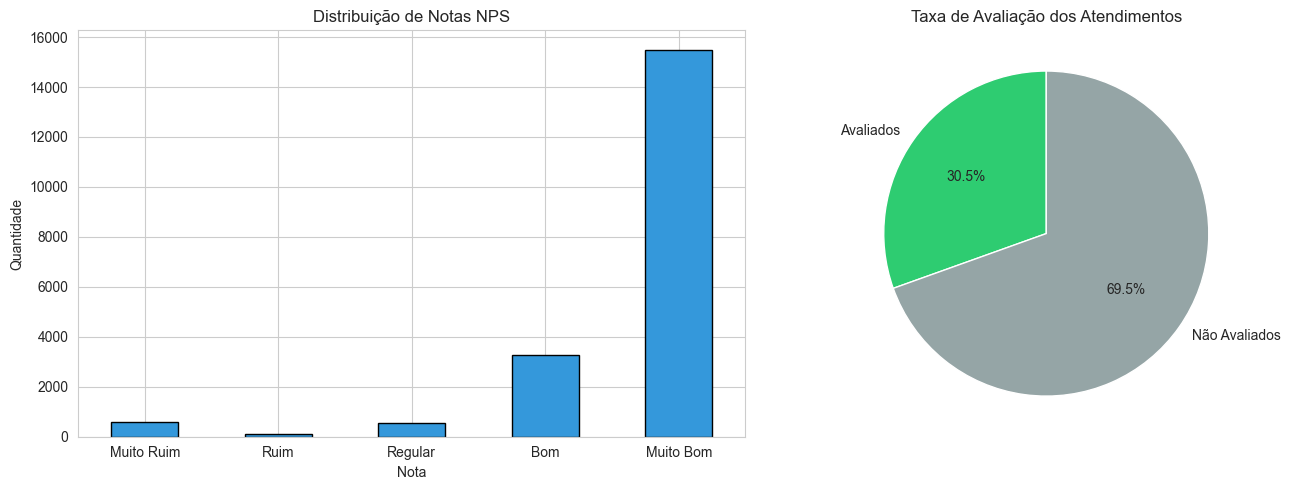

In [30]:
# Análise de NPS (Smart)
print("ANÁLISE DE NPS (Net Promoter Score)")

coluna_resposta = 'resposta'
distribuicao_notas_smart = df_smart_completo[coluna_resposta].value_counts().sort_index().reindex(classificacao_respostas)
display(distribuicao_notas_smart)

avaliados_smart = df_smart_completo[coluna_resposta].notna().sum()
nao_avaliados_smart = df_smart_completo[coluna_resposta].isnull().sum()
taxa_avaliacao_smart = (avaliados_smart / len(df_smart_completo) * 100)

print(f"\nAtendimentos avaliados: {avaliados_smart:,} ({taxa_avaliacao_smart:.2f}%)")
print(f"Não avaliados: {nao_avaliados_smart:,} ({(nao_avaliados_smart/len(df_smart_completo)*100):.2f}%)")

# Visualização
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras - Notas
distribuicao_notas_smart.plot(kind='bar', ax=ax[0], color='#3498db', edgecolor='black')
ax[0].set_xlabel('Nota')
ax[0].set_ylabel('Quantidade')
ax[0].set_title('Distribuição de Notas NPS')
ax[0].tick_params(axis='x', rotation=0)

# Pizza - Taxa de avaliação
ax[1].pie([avaliados_smart, nao_avaliados_smart], 
            labels=['Avaliados', 'Não Avaliados'],
            autopct='%1.1f%%',
            colors=['#2ecc71', '#95a5a6'],
            startangle=90)
ax[1].set_title('Taxa de Avaliação dos Atendimentos')

plt.tight_layout()
plt.show()

## 7. Carregando: Planilha de Agentes (CSV)

In [31]:
try:
    df_agentes = pd.read_csv('https://docs.google.com/spreadsheets/d/1_YAL1hK-FmFcqZLBMM4uSdrAutjDTlGEWX3myfmlFiM/pub?gid=0&single=true&output=csv')
    print(f"Planilha de agentes carregada: {len(df_agentes):,} registros")
    display(df_agentes.head(3))
except Exception as e:
    print(f"Erro ao ler o arquivo. Erro:{e}")

Planilha de agentes carregada: 156 registros


,Mês Referencia,Agente,Turno,Meta NPS
0,01/01/2022,Jon Skywalker,T1,"70,00%"
1,01/01/2022,Daenerys Organa,T1,"70,00%"
2,01/01/2022,Tyrion Solo,T1,"70,00%"


In [32]:
df_agentes.rename(columns={'Agente': 'agente', 'Mês Referencia': 'mes_referencia'}, inplace=True)

In [33]:
df_agentes['mes_referencia'] = pd.to_datetime(df_agentes['mes_referencia'])

In [34]:
df_agentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   mes_referencia  156 non-null    datetime64[ns]
 1   agente          156 non-null    object        
 2   Turno           156 non-null    object        
 3   Meta NPS        156 non-null    object        
dtypes: datetime64[ns](1), object(3)
memory usage: 5.0+ KB


## 7.5 Combinando Consultas

### native

In [35]:
# Converter timedelta para segundos
df_native['atendimento_seg'] = df_native['atendimento'].dt.total_seconds()
df_native['espera_seg'] = df_native['espera'].dt.total_seconds()

# Filtrar válidas
native_validas = df_native[df_native['atendimento_seg'] >= 30].copy()

# Padronizar
native_prep = native_validas[['agente', 'atendimento_seg', 'espera_seg', 'nota2', 'data_hora']]
native_prep.rename(columns={'nota2': 'nota_nps', 'data_hora': 'data_atendimento'}, inplace=True)
native_prep['modalidade'] = 'Telefone'

In [36]:
df_native.shape

(37702, 14)

In [37]:
native_prep.shape

(27842, 6)

In [38]:
native_prep.shape

(27842, 6)

### smart

In [39]:
# Converter timedelta para segundos
df_smart_completo['atendimento_seg'] = df_smart_completo['tempo_atendimento'].dt.total_seconds()
df_smart_completo['espera_seg'] = df_smart_completo['tempo_fila'].dt.total_seconds()

# Filtrar com agente
smart_agentes = df_smart_completo[df_smart_completo['agente_atend'].notnull()].copy()

# Padronizar
smart_prep = smart_agentes[['agente_atend', 'atendimento_seg', 'espera_seg', 'resposta', 'data_atendimento']]
smart_prep.rename(columns={'agente_atend': 'agente', 'resposta': 'nota_nps'}, inplace=True)
smart_prep['modalidade'] = 'Online'

# Conversão Qualitativa para NPS
mapa_classificacao = dict(zip(classificacao_respostas, [5,4,3,2,1]))
smart_prep['nota_nps'] = smart_prep['nota_nps'].map(mapa_classificacao)

In [40]:
smart_agentes.shape

(39309, 17)

### combinações

In [41]:
df_master = pd.concat([native_prep, smart_prep], ignore_index=True)
display(df_master.head(3))
df_master.info()

,agente,atendimento_seg,espera_seg,nota_nps,data_atendimento,modalidade
0,Jon Skywalker,215.00,4.00,1.00,2022-01-01 08:34:46,Telefone
1,Daenerys Organa,157.00,6.00,5.00,2022-01-01 09:10:01,Telefone
2,Tyrion Solo,321.00,2.00,1.00,2022-01-01 09:11:43,Telefone


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67151 entries, 0 to 67150
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   agente            67151 non-null  object        
 1   atendimento_seg   67151 non-null  float64       
 2   espera_seg        67151 non-null  float64       
 3   nota_nps          31258 non-null  Float64       
 4   data_atendimento  67151 non-null  datetime64[ns]
 5   modalidade        67151 non-null  object        
dtypes: Float64(1), datetime64[ns](1), float64(2), object(2)
memory usage: 3.1+ MB


In [42]:
#df_master['data_atendimento'] = df_master['data_atendimento'].dt.date
df_master['mes_atendimento'] = df_master['data_atendimento'].dt.to_period('M').dt.to_timestamp()
display(df_master.tail(3))
df_master.info()

,agente,atendimento_seg,espera_seg,nota_nps,data_atendimento,modalidade,mes_atendimento
67148,Meera C-3PO,14.00,3.00,<NA>,2022-03-30 21:54:08,Online,2022-03-01
67149,Khal Maul,969.00,3.00,1.00,2022-03-30 21:56:14,Online,2022-03-01
67150,Podrick Antilles,307.00,1.00,<NA>,2022-03-30 21:57:38,Online,2022-03-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67151 entries, 0 to 67150
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   agente            67151 non-null  object        
 1   atendimento_seg   67151 non-null  float64       
 2   espera_seg        67151 non-null  float64       
 3   nota_nps          31258 non-null  Float64       
 4   data_atendimento  67151 non-null  datetime64[ns]
 5   modalidade        67151 non-null  object        
 6   mes_atendimento   67151 non-null  datetime64[ns]
dtypes: Float64(1), datetime64[ns](2), float64(2), object(2)
memory usage: 3.7+ MB


### transformações

In [43]:
df_master.columns.to_list()

['agente',
 'atendimento_seg',
 'espera_seg',
 'nota_nps',
 'data_atendimento',
 'modalidade',
 'mes_atendimento']

In [44]:
def calcular_nps(series):
    promotores = (series > 3).sum()
    detratores = (series < 3).sum()
    
    total = series.count()
    
    if total == 0: return 0

    return (promotores - detratores) / total * 100

In [45]:
df_master_agrupado = df_master.groupby(['agente', 'mes_atendimento']).agg(
    total_atendimento = ('agente', 'count'),
    tma_medio = ('atendimento_seg', 'mean'),
    tma_total = ('atendimento_seg', 'sum'),
    #nota_nps = ('nota_nps', 'mean')
    nota_nps = ('nota_nps', calcular_nps)
).reset_index()

In [46]:
df_master.describe()

,atendimento_seg,espera_seg,nota_nps,data_atendimento,mes_atendimento
count,67151.00,67151.00,31258.00,67151,67151
mean,1277.76,82.36,2.73,2022-02-14 18:50:55.951423232,2022-01-31 04:53:36.845616640
min,5.00,0.00,1.00,2022-01-01 07:29:07,2022-01-01 00:00:00
25%,269.00,1.00,1.00,2022-01-25 10:32:06.500000,2022-01-01 00:00:00
50%,835.00,3.00,2.00,2022-02-15 10:24:31,2022-02-01 00:00:00
75%,1837.00,6.00,5.00,2022-03-08 14:18:32,2022-03-01 00:00:00
max,338923.00,142898.00,5.00,2022-03-30 21:57:38,2022-03-01 00:00:00
std,2063.00,1963.60,1.86,NaN,NaN


### Mesclar tabela agentes

In [47]:
df_final_com_turno = pd.merge(
    df_master_agrupado, 
    df_agentes, 
    left_on=['agente', 'mes_atendimento'], 
    right_on=['agente', 'mes_referencia'],
    how='left'
)

In [48]:
#df_final_com_turno['nota_nps'] = df_final_com_turno['nota_nps'].apply(lambda x: x/5)

In [49]:
df_final_com_turno.head(3)

,agente,mes_atendimento,total_atendimento,tma_medio,tma_total,nota_nps,mes_referencia,Turno,Meta NPS
0,Arya Kenobi,2022-01-01,88,329.22,28971.00,84.00,2022-01-01,T1,"70,00%"
1,Arya Kenobi,2022-02-01,45,297.09,13369.00,86.67,NaT,NaN,NaN
2,Arya Kenobi,2022-03-01,42,333.62,14012.00,80.00,NaT,NaN,NaN


In [50]:
df_final_com_turno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   agente             123 non-null    object        
 1   mes_atendimento    123 non-null    datetime64[ns]
 2   total_atendimento  123 non-null    int64         
 3   tma_medio          123 non-null    float64       
 4   tma_total          123 non-null    float64       
 5   nota_nps           123 non-null    Float64       
 6   mes_referencia     41 non-null     datetime64[ns]
 7   Turno              41 non-null     object        
 8   Meta NPS           41 non-null     object        
dtypes: Float64(1), datetime64[ns](2), float64(2), int64(1), object(3)
memory usage: 8.9+ KB


In [51]:
df_final_com_turno['Meta NPS'] = df_final_com_turno['Meta NPS'].fillna('Sem Meta')

[]

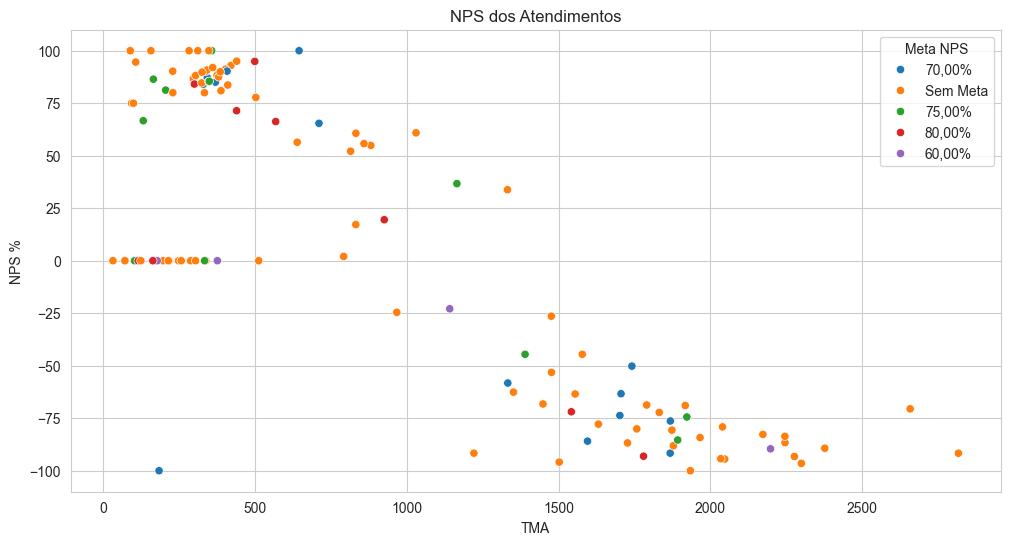

In [52]:
df_final_com_turno
fig1 = sns.scatterplot(
    data=df_final_com_turno,
    x='tma_medio',
    y='nota_nps',
    hue='Meta NPS'
)

fig1.set_title("NPS dos Atendimentos")
fig1.set_ylabel("NPS %")
fig1.set_xlabel("TMA")

fig1.plot()

[]

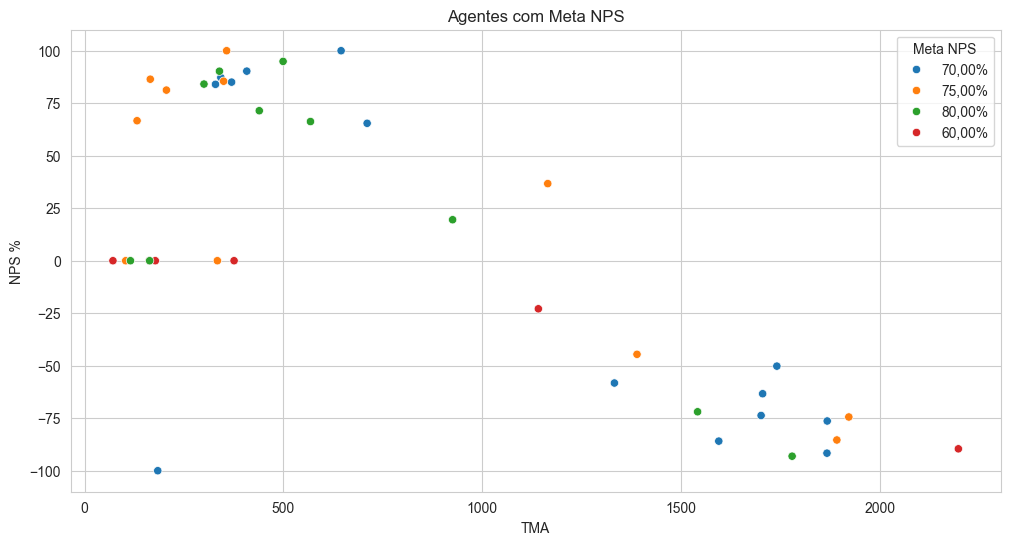

In [53]:
df_final_com_meta = df_final_com_turno[df_final_com_turno['Meta NPS'] != "Sem Meta"]
fig1 = sns.scatterplot(
    data=df_final_com_meta,
    x='tma_medio',
    y='nota_nps',
    hue='Meta NPS',
)

fig1.set_title("Agentes com Meta NPS")
fig1.set_ylabel("NPS %")
fig1.set_xlabel("TMA")

fig1.plot()

[]

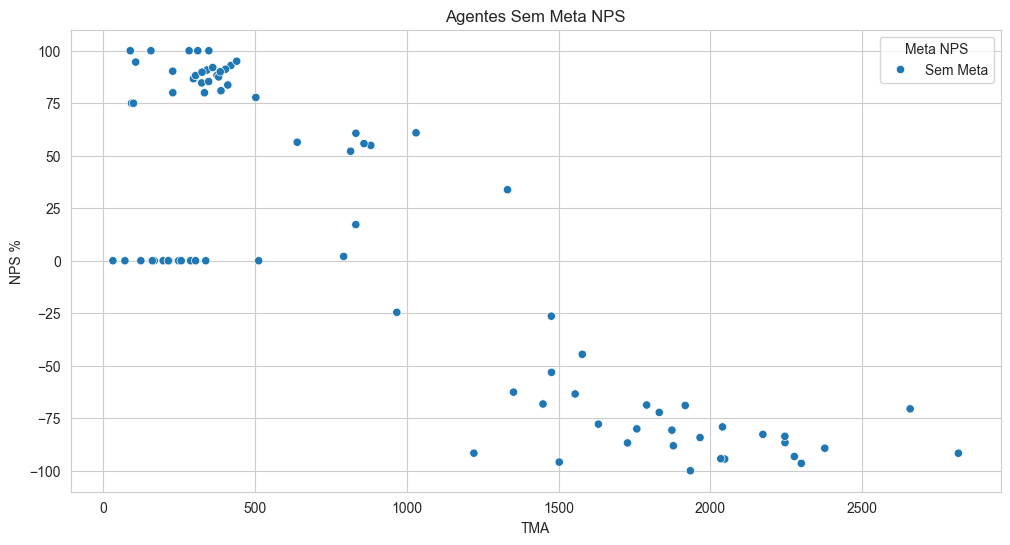

In [54]:
df_final_sem_meta = df_final_com_turno[df_final_com_turno['Meta NPS'] == "Sem Meta"]
fig1 = sns.scatterplot(
    data=df_final_sem_meta,
    x='tma_medio',
    y='nota_nps',
    hue='Meta NPS',
)

fig1.set_title("Agentes Sem Meta NPS")
fig1.set_ylabel("NPS %")
fig1.set_xlabel("TMA")

fig1.plot()

In [59]:
# Top 10 agentes por volume
df_ordenado = df_final_com_turno.sort_values('mes_atendimento', ascending=False)
df_ordenado = df_ordenado.drop_duplicates(subset=['agente'], keep='first')

best_agentes = df_ordenado.sort_values('nota_nps', ascending=False).head(10)
print(f"\nTop 10 Agentes (por volume de atendimentos):")
display(best_agentes)

# Top 5 agentes com baixa performance (nota < 3)
not_so_great_agentes = df_final_com_turno.sort_values('nota_nps', ascending=True).tail(5)
print(f"\nTop 10 Agentes com baixa performance (nota < 3):")
display(not_so_great_agentes)


Top 10 Agentes (por volume de atendimentos):


,agente,mes_atendimento,total_atendimento,tma_medio,tma_total,nota_nps,mes_referencia,Turno,Meta NPS
58,Jorah Vader,2022-03-01,388,89.03,34545.00,100.00,NaT,NaN,Sem Meta
94,Samwell Chewbacca,2022-03-01,103,348.05,35849.00,100.00,NaT,NaN,Sem Meta
11,Brienne Tarkin,2022-03-01,200,311.58,62316.00,100.00,NaT,NaN,Sem Meta
5,Barristan Kylo,2022-03-01,255,90.24,23012.00,100.00,NaT,NaN,Sem Meta
118,Varys Dooku,2022-03-01,427,439.74,187768.00,95.02,NaT,NaN,Sem Meta
73,Melisandre Dooku,2022-03-01,353,360.70,127326.00,92.00,NaT,NaN,Sem Meta
31,Eddard Yoda,2022-03-01,630,403.06,253930.00,91.19,NaT,NaN,Sem Meta
109,Tarly Jabba,2022-03-01,765,325.54,249040.00,89.79,NaT,NaN,Sem Meta
17,Cersei Palpatine,2022-03-01,663,304.30,201752.00,88.18,NaT,NaN,Sem Meta
8,Bran Calrissian,2022-03-01,880,380.24,334615.00,87.53,NaT,NaN,Sem Meta



Top 10 Agentes com baixa performance (nota < 3):


,agente,mes_atendimento,total_atendimento,tma_medio,tma_total,nota_nps,mes_referencia,Turno,Meta NPS
5,Barristan Kylo,2022-03-01,255,90.24,23012.00,100.00,NaT,NaN,Sem Meta
29,Eddard Yoda,2022-01-01,4,645.25,2581.00,100.00,2022-01-01,T1,"70,00%"
58,Jorah Vader,2022-03-01,388,89.03,34545.00,100.00,NaT,NaN,Sem Meta
92,Samwell Chewbacca,2022-01-01,258,357.29,92180.00,100.00,2022-01-01,T2,"75,00%"
94,Samwell Chewbacca,2022-03-01,103,348.05,35849.00,100.00,NaT,NaN,Sem Meta


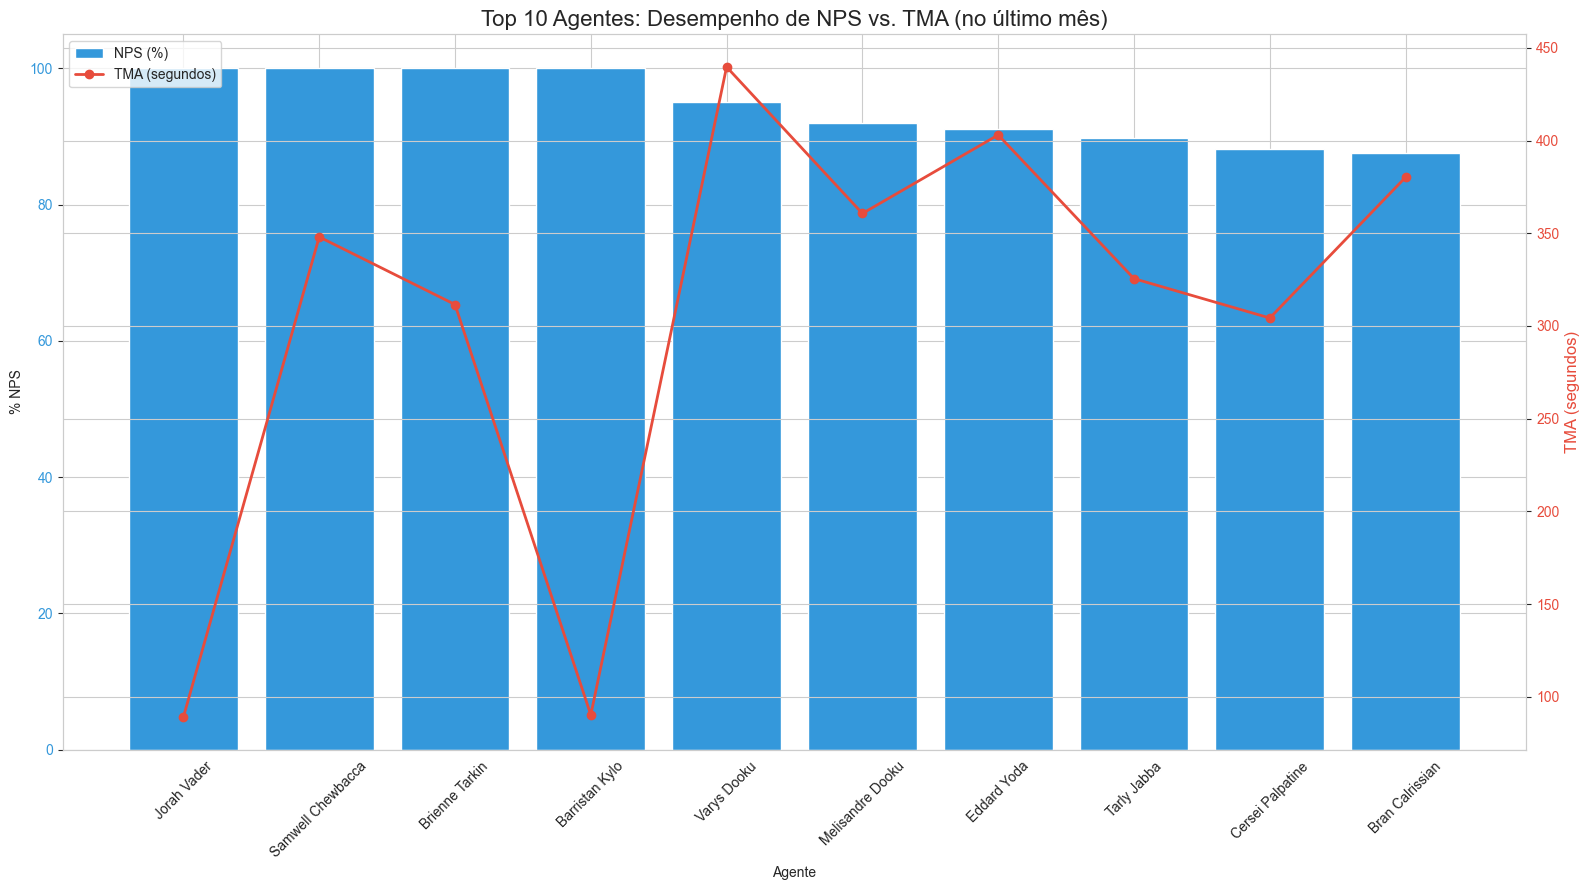

In [61]:
# Visualização
fig, ax1 = plt.subplots(figsize=(16, 9))

cor_barra = '#3498db'
cor_linha = '#e74c3c'

ax1.bar(
    best_agentes['agente'], 
    best_agentes['nota_nps'],
    color=cor_barra,
    label = 'NPS (%)'
)
ax1.set_ylabel('% NPS')
ax1.set_xlabel('Agente')
ax1.tick_params(axis='y', labelcolor=cor_barra)

ax2 = ax1.twinx()
ax2.plot(
    best_agentes['agente'], 
    best_agentes['tma_medio'],
    color=cor_linha,
    marker='o',
    linewidth=2,
    label = 'TMA (segundos)'
)
ax2.set_ylabel('TMA (segundos)', color=cor_linha, fontsize=12)
ax2.tick_params(axis='y', labelcolor=cor_linha)

plt.title('Top 10 Agentes: Desempenho de NPS vs. TMA (no último mês)', fontsize=16)
ax1.tick_params(axis='x', rotation=45)
fig.tight_layout()

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

## Fim